In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df_a = pd.read_csv("Dataset/user_a.csv")
df_b = pd.read_csv("Dataset/user_b.csv")
df_c = pd.read_csv("Dataset/user_c.csv")

df = pd.concat([df_a, df_b, df_c], ignore_index=True)
X = df.drop(columns=['Class'])
Y = df['Class']

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [6]:
'''model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)), 
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')

])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) ''' 

# CNN gave an accuracy of 81.19 with combined EEG datasets of user_a, user_b, and user_c%

"model = Sequential([\n    Dense(256, activation='relu', input_shape=(X_train.shape[1],)), \n    Dropout(0.3),\n    Dense(128, activation='relu'),\n    Dropout(0.3),\n    Dense(64, activation='relu'),\n    Dropout(0.3),\n    Dense(32, activation='relu'),\n    Dense(num_classes, activation='softmax')\n\n])\nmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) "

In [30]:
history = model.fit(X_train, Y_train, epochs=200, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.9093 - loss: 0.2412 - val_accuracy: 0.7824 - val_loss: 0.5652
Epoch 2/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.9255 - loss: 0.2189 - val_accuracy: 0.7865 - val_loss: 0.5762
Epoch 3/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.9090 - loss: 0.2315 - val_accuracy: 0.7888 - val_loss: 0.5579
Epoch 4/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.9169 - loss: 0.2201 - val_accuracy: 0.7801 - val_loss: 0.5819
Epoch 5/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.9170 - loss: 0.2170 - val_accuracy: 0.7870 - val_loss: 0.5526
Epoch 6/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.9050 - loss: 0.2402 - val_accuracy: 0.8009 - val_loss: 0.5576
Epoch 7/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.9109 - loss: 0.2285 - val_accuracy: 0.7882 - val_loss: 0.5958
Epoch 8/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.9059 - loss: 0

In [31]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.8077 - loss: 0.6017
Test Accuracy: 81.19%


In [32]:
import matplotlib.pyplot as plt

In [33]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

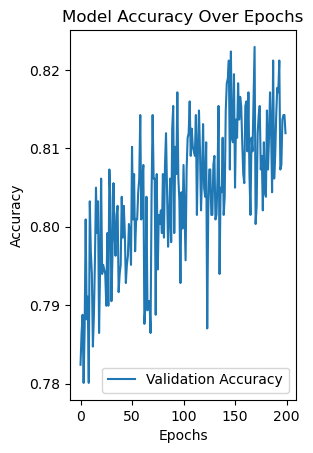

In [34]:
plt.subplot(1, 2, 1)

plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.legend()

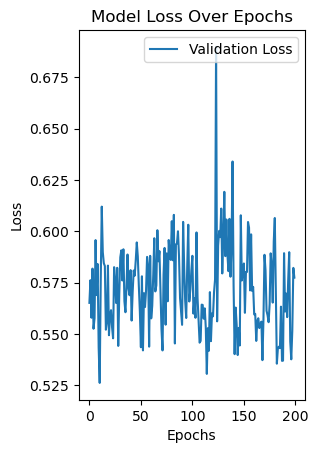

In [35]:
plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()

In [9]:
import xgboost as xgb

model = xgb.XGBClassifier(
    objective='multi:softmax', 
    num_class=len(Y.unique()),
    eval_metric='mlogloss',
    user_label_encode=False
)
model.fit(X_train, Y_train)

/Users/jaivalpatel/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:36:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "user_label_encode" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [11]:
from sklearn.metrics import accuracy_score
Y_pred_xgb = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred_xgb)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


# Total Accuracy for XGBoost: 83%

Test Accuracy: 82.99%
